<a href="https://colab.research.google.com/github/abhi66y9085/FUTURE_INTERN_ML_01/blob/main/Future_ML_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Future_Intern/sales_data_sample.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
print("✅ Dataset Loaded Successfully")

✅ Dataset Loaded Successfully


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from prophet.plot import plot_plotly
import plotly.graph_objs as go
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
# STEP 1: Loading and processing the data

df = pd.read_csv('/content/drive/MyDrive/Future_Intern/sales_data_sample.csv', encoding='latin1')

# Renaming for clarity
df.rename(columns={'ORDERDATE': 'OrderDate', 'SALES': 'Sales', 'PRODUCTLINE': 'ProductLine'}, inplace=True)

#Converting date
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

#Checking for unique product lines
print(df['ProductLine'].unique())

['Motorcycles' 'Classic Cars' 'Trucks and Buses' 'Vintage Cars' 'Planes'
 'Ships' 'Trains']


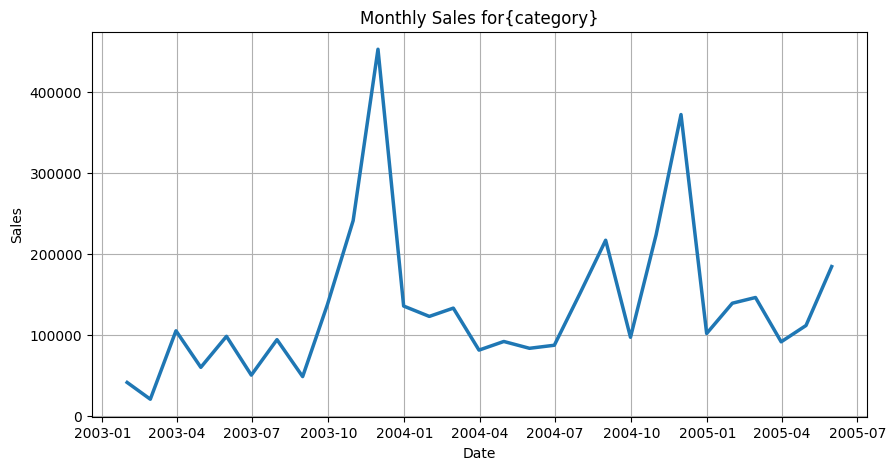

In [5]:
#STEP 2: Grouping the monthly sales for one product line

category = 'Classic Cars'
df_group = df[df['ProductLine'] == category].groupby(pd.Grouper(key='OrderDate', freq='ME')) ['Sales'].sum().reset_index()

#Renaming for prophet
df_group.rename(columns={'OrderDate': 'ds', 'Sales': 'y'}, inplace=True)

#df Droping the missing data
df_group.dropna(inplace=True)

#Ploting the original data

plt.figure(figsize=(10,5))
sns.lineplot(data=df_group, x='ds', y='y', linewidth=2.5)
plt.title("Monthly Sales for{category}")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

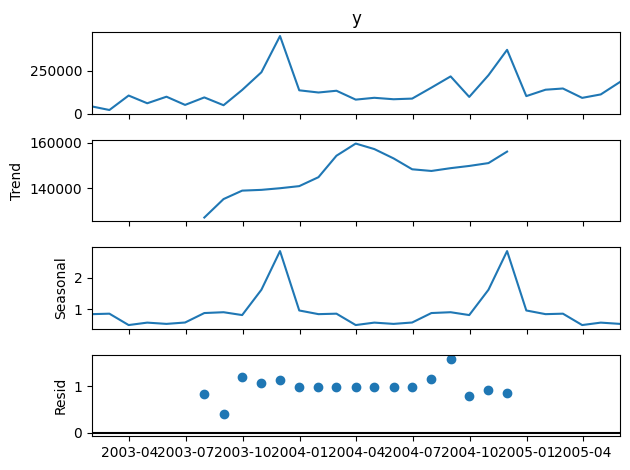

In [6]:
#STEP 3: Time series Decomposition

decomposition = seasonal_decompose(df_group.set_index('ds')['y'], model='multiplicative')
decomposition.plot()
plt.tight_layout()
plt.show()

In [7]:
#STEP 4: Training prophet with multiplicative Seasonality
model = Prophet(seasonality_mode='multiplicative')
model.fit(df_group)

#predicting future
future = model.make_future_dataframe(periods=6, freq='ME')
forecast = model.predict(future)

#poltly interactive forecast
plot_plotly(model, forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2ve65sr/0m7c8xkc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo2ve65sr/lpjrlq5d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74830', 'data', 'file=/tmp/tmpo2ve65sr/0m7c8xkc.json', 'init=/tmp/tmpo2ve65sr/lpjrlq5d.json', 'output', 'file=/tmp/tmpo2ve65sr/prophet_model2wvrc7zf/prophet_model-20250508143846.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:38:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:38:47 - cmdstanpy - INFO - Chain [1] done processing
INFO: